In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	2
float64		column 3	1
float64		column 4	2
float64		column 5	2
float64		column 6	5
float64		column 7	4
float64		column 8	5
float64		column 9	3
float64		column 10	4
float64		column 11	6
float64		column 12	2


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,400.000000,398.000000,399.000000,398.000000,398.000000,395.000000,396.000000,395.000000,397.000000,396.000000,394.000000,398.000000
mean,-0.100319,0.053862,2.042989,1.900565,1.935772,1.981341,2.028573,1.985326,1.965702,2.027675,1.960215,1.965607
std,2.564450,2.770828,1.133137,1.144195,1.160883,1.145452,1.159376,1.145859,1.149230,1.159340,1.154479,1.190780
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.694850,-0.835295,1.124100,0.945820,0.880200,1.042650,0.982585,1.024100,0.996580,1.039925,0.910822,0.912077
50%,-0.068013,0.015595,2.093200,1.786250,1.921050,2.022800,2.098100,1.975400,2.069100,2.088500,1.904550,1.931250
75%,0.763967,0.887540,2.992350,2.803325,2.955475,2.966300,2.978600,3.033200,2.931600,3.042800,2.966425,3.005175
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

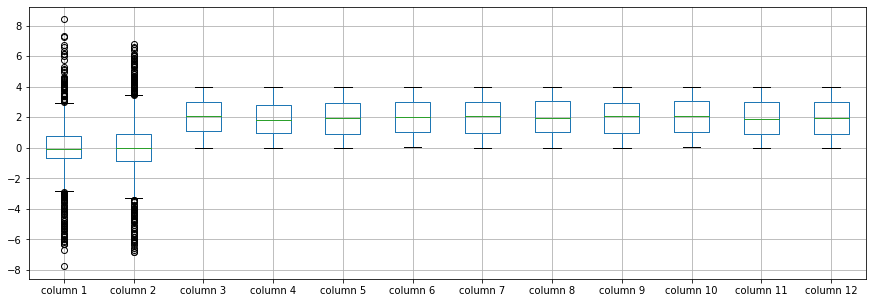

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.100319
column 2     0.053862
column 3     2.042989
column 4     1.900565
column 5     1.935772
column 6     1.981341
column 7     2.028573
column 8     1.985326
column 9     1.965702
column 10    2.027675
column 11    1.960215
column 12    1.965607
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.019285,-0.046632,-0.077606,0.002609,0.000431,-0.014936,0.029027,-0.013661,0.040144,0.077899,-0.013427
column 2,0.019285,1.000000,-0.056138,0.033570,-0.077374,-0.078944,0.013621,-0.020351,-0.015392,0.024735,-0.036315,0.065751
column 3,-0.046632,-0.056138,1.000000,0.012558,-0.012697,-0.067434,-0.093880,0.071330,0.105824,-0.023301,-0.080124,-0.012512
column 4,-0.077606,0.033570,0.012558,1.000000,-0.011220,0.083684,0.010979,0.092191,0.000783,0.064012,-0.033523,-0.066381
column 5,0.002609,-0.077374,-0.012697,-0.011220,1.000000,0.077706,0.028406,0.002433,-0.004228,0.023880,0.018884,-0.035109
column 6,0.000431,-0.078944,-0.067434,0.083684,0.077706,1.000000,0.003302,0.063340,0.004327,-0.003315,0.028320,-0.054970
column 7,-0.014936,0.013621,-0.093880,0.010979,0.028406,0.003302,1.000000,-0.021327,0.071449,0.044102,0.015643,-0.068351
column 8,0.029027,-0.020351,0.071330,0.092191,0.002433,0.063340,-0.021327,1.000000,0.063225,-0.139892,-0.047295,-0.013455
column 9,-0.013661,-0.015392,0.105824,0.000783,-0.004228,0.004327,0.071449,0.063225,1.000000,0.010045,0.029006,0.050691
column 10,0.040144,0.024735,-0.023301,0.064012,0.023880,-0.003315,0.044102,-0.139892,0.010045,1.000000,-0.009766,0.025818


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+19,12+19+19,12+19+19+19,12+19+19+19+19,12+19+19+19+19+19,12+19+19+19+19+19+19,12+19+19+19+19+19,12+19+19+19+19,12+19+19+19,12+19+19,12+19,12], vae_layer = False, seed = 19)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.699772186279297
Epoch: 1 , loss: 27.66893165588379
Epoch: 2 , loss: 27.65436264038086
Epoch: 3 , loss: 27.56257698059082
Epoch: 4 , loss: 27.46665252685547
Epoch: 5 , loss: 27.30311653137207
Epoch: 6 , loss: 27.156881561279295
Epoch: 7 , loss: 26.763621673583984
Epoch: 8 , loss: 25.155419540405273
Epoch: 9 , loss: 22.38195343017578
Epoch: 10 , loss: 21.28221176147461
Epoch: 11 , loss: 21.202799682617187
Epoch: 12 , loss: 20.51165428161621
Epoch: 13 , loss: 20.73151039123535
Epoch: 14 , loss: 20.449088668823244
Epoch: 15 , loss: 20.464559783935545
Epoch: 16 , loss: 20.18686294555664
Epoch: 17 , loss: 20.087611312866212
Epoch: 18 , loss: 20.01219337463379
Epoch: 19 , loss: 20.41685935974121
Epoch: 20 , loss: 20.138940505981445
Epoch: 21 , loss: 19.75363136291504
Epoch: 22 , loss: 19.878806076049806
Epoch: 23 , loss: 19.61987922668457
Epoch: 24 , loss: 19.83337677001953
Epoch: 25 , loss: 19.64946266174

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(9.616545095917468, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.05889803214498991

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AG_1(imp).xlsx", index=False, header=False)